# Part 0: Make sure you installed pymatgen

In [1]:
#check the version for pymatgen
import pymatgen.core
print(pymatgen.core.__version__)

2023.12.18


# Part 1: Composition Data

Composition data refers to the chemical makeup of a material, indicating the elements present and their proportions. It is a fundamental concept in materials science, providing insight into the properties and applications of a materia.

Example: `Fe2O3` represents a composition containing 2 parts iron (Fe) and 3 parts oxygenO).#

## Operations with Composition Data
This section explores how to manipulate and analyze composition data using pymatgen, a powerful library for materials anlysis.

### 1. Creating a Composition
You can define compositions using either a formula string or a dictionary with elements and their qantities.

### 2. Accessing Composition Information
Retrieve specific details about the composition, such as the elements involved, their quantities, and the total molecular weight.ular weight.

### 3. Analyzing Elemental Properties
Explore more detailed properties of the composition, like the atomic numbers of the elements, their ratios, and other descriptors that help understand the material's chemistry.
nalysis
.


In [2]:
from pymatgen.core import Composition

# 1. Creating Composition objects
print("1. Creating Composition objects:")
comp1 = Composition("Fe2O3")
comp2 = Composition({"Li": 1, "Fe": 1, "P": 1, "O": 4})
comp3 = Composition("H2O")

print(f"Composition 1: {comp1}")
print(f"Composition 2: {comp2}")
print(f"Composition 3: {comp3}")

# 2. Accessing composition information
print("\n2. Accessing composition information:")
print(f"Elements in comp1: {comp1.elements}")
print(f"Amount of Fe in comp1: {comp1['Fe']}")
print(f"Weight of comp2: {comp2.weight:.2f} g/mol")

# 3. Element ratios
print("\n3. Element ratios:")
print(f"Fe:O ratio in comp1: {comp1.get_atomic_fraction('Fe') / comp1.get_atomic_fraction('O'):.2f}")
print(f"Fractional composition of comp2: {comp2.fractional_composition}")

# 5. Composition analysis and comparisons
print("\n5. Composition analysis and comparisons:")
print(f"Is comp1 metal? {comp1.is_element}")
print(f"Number of atoms in comp2: {comp2.num_atoms}")
print(f"Reduced formula of comp2: {comp2.reduced_formula}")
print(f"Are comp1 and comp2 equal? {comp1 == comp2}")

# 6. Elemental properties
print("\n6. Elemental properties:")
print(f"Average electronegativity of comp1: {comp1.average_electroneg:.2f}")

# 7. Composition manipulations
print("\n7. Composition manipulations:")
mixed_comp = comp1 + comp3
print(f"Mixed composition (comp1 + comp3): {mixed_comp}")
scaled_comp = 2 * comp2
print(f"Scaled composition (2 * comp2): {scaled_comp}")

# 8. Chemical system
print("\n8. Chemical system:")
print(f"Chemical system of comp1: {comp1.chemical_system}")
print(f"Chemical system of comp2: {comp2.chemical_system}")

# 9. Composition descriptors
print("\n9. Composition descriptors:")
print(f"Element composition of comp1: {comp1.get_el_amt_dict()}")

1. Creating Composition objects:
Composition 1: Fe2 O3
Composition 2: Li1 Fe1 P1 O4
Composition 3: H2 O1

2. Accessing composition information:
Elements in comp1: [Element Fe, Element O]
Amount of Fe in comp1: 2.0
Weight of comp2: 157.76 g/mol

3. Element ratios:
Fe:O ratio in comp1: 0.67
Fractional composition of comp2: Li0.14285714 Fe0.14285714 P0.14285714 O0.57142857

5. Composition analysis and comparisons:
Is comp1 metal? False
Number of atoms in comp2: 7
Reduced formula of comp2: LiFePO4
Are comp1 and comp2 equal? False

6. Elemental properties:
Average electronegativity of comp1: 2.80

7. Composition manipulations:
Mixed composition (comp1 + comp3): Fe2 O4 H2
Scaled composition (2 * comp2): Li2 Fe2 P2 O8

8. Chemical system:
Chemical system of comp1: Fe-O
Chemical system of comp2: Fe-Li-O-P

9. Composition descriptors:
Element composition of comp1: {'Fe': 2.0, 'O': 3.0}


# Part 2: Let's make a Structure object
We can create ``Structure`` objects:
* Using Python
* From a file
* From an API (eg. a database of structures like the Materials Project)

## We'll start by creating a basic ``Structure`` using Python.

In [3]:
#creating a basic structure using python
from pymatgen.core import Lattice, Structure

# Define the lattice (cell lengths and angles). Note that the units are Angstroms
a, b, c = 3.9, 3.9, 3.9
alpha, beta, gamma = 90, 90, 90
lattice = Lattice.from_parameters(a, b, c, alpha, beta, gamma)

# Define the basis (atomic positions and species)
species = ["Sr", "Pb", "O", "O", "O"]
coords = [
    [0.0, 0.0, 0.0],         # Pb
    [0.5, 0.5, 0.5],         # Ti
    [0.5, 0.5, 0.0],         # O1
    [0.0, 0.5, 0.5],         # O2
    [0.5, 0.0, 0.5]          # O3
]

# Create the structure
PTO_structure = Structure(lattice, species, coords)
print(PTO_structure)  # print the Structure

Full Formula (Sr1 Pb1 O3)
Reduced Formula: SrPbO3
abc   :   3.900000   3.900000   3.900000
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (5)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Sr    0    0    0
  1  Pb    0.5  0.5  0.5
  2  O     0.5  0.5  0
  3  O     0    0.5  0.5
  4  O     0.5  0    0.5


## Then we can load a basic ``Structure`` from existing file. 
* Download the crystal strcutre from an online database (The Materials Project)
* The Materials Project web site: https://next-gen.materialsproject.org/

### We can also load a structure from an API (Materials Project)
* Using the API will give you instant access to >150,000 crystal structures that are available on the Materials Project web site.

In [4]:
#loading a structure from file
PTO_structure_from_cif = Structure.from_file("files/TiPbO3.cif")
print(PTO_structure_from_cif)  # print the structure - note the oxidation states!

Full Formula (Ti1 Pb1 O3)
Reduced Formula: TiPbO3
abc   :   3.969049   3.969049   3.969049
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (5)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Ti4+  0.5  0.5  0.5
  1  Pb2+  0    0    0
  2  O2-   0    0.5  0.5
  3  O2-   0.5  0    0.5
  4  O2-   0.5  0.5  0


## What can you do directly with a Structure?
* Once you define a ``Structure``, many different functions and analysis are available

In [5]:
from pymatgen.core import Structure, Lattice

# 1. Creating Structure objects
print("1. Creating Structure objects:")
# Define a lattice for the structure
lattice = Lattice.cubic(4.2)  # Example with a cubic lattice with a 4.2 Å lattice parameter
# Create a structure with spacegroup, lattice, species, and coordinates
structure1 = Structure(lattice, ["Fe", "O", "O", "O"], [[0, 0, 0], [0.5, 0.5, 0.5], [0.5, 0.5, 0], [0.5, 0, 0.5]])

print(f"Structure 1: {structure1}")

# 2. Accessing structure information
print("\n2. Accessing structure information:")
print(f"Number of sites in structure1: {len(structure1)}")
print(f"Species at first site: {structure1[0].species}")
print(f"Lattice of structure1: {structure1.lattice}")

# 3. Site-specific information
print("\n3. Site-specific information:")
print(f"Fractional coordinates of first site: {structure1[0].frac_coords}")
print(f"Distance between first and second site: {structure1.get_distance(0, 1)}")

# 4. Neighbor analysis
print("\n4. Neighbor analysis:")
neighbors = structure1.get_neighbors(structure1[0], 3)  # Get neighbors within 3 Å
print(f"Neighbors of first site within 3 Å: {len(neighbors)}")

# 5. Structure properties
print("\n5. Structure properties:")
print(f"Volume of the unit cell: {structure1.volume:.2f} Å^3")

# 6. Symmetry and system properties
print("\n6. Symmetry and system properties:")
print(f"Space group of structure1: {structure1.get_space_group_info()}")


1. Creating Structure objects:
Structure 1: Full Formula (Fe1 O3)
Reduced Formula: FeO3
abc   :   4.200000   4.200000   4.200000
angles:  90.000000  90.000000  90.000000
pbc   :       True       True       True
Sites (4)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Fe    0    0    0
  1  O     0.5  0.5  0.5
  2  O     0.5  0.5  0
  3  O     0.5  0    0.5

2. Accessing structure information:
Number of sites in structure1: 4
Species at first site: Fe1
Lattice of structure1: 4.2 0.0 0.0
0.0 4.2 0.0
0.0 0.0 4.2

3. Site-specific information:
Fractional coordinates of first site: [0 0 0]
Distance between first and second site: 3.6373066958946425

4. Neighbor analysis:
Neighbors of first site within 3 Å: 8

5. Structure properties:
Volume of the unit cell: 74.09 Å^3

6. Symmetry and system properties:
Space group of structure1: ('P4/mmm', 123)


# Part 3: Matminer### What is Matminer?
* Matminer is an open-source library for performing materials data mining
  
* Matminer facilitates the extraction of materials data from various sources, manipulation of materials data, and running data mining algorithms on materials data

### Exploring and visualizing 
1. Loads the "elastic_tensor_2015" dataset.
2. Displays the first few rows and column names of the dataset.
3. Shows properties of the first material in the dataset, including its formula, number of sites, volume, and elastic properties.
4. Finds the material with the highest bulk modulus.
5. Calculates and prints average properties for all materials.
6. Creates a scatter plot of bulk modulus vs shear modulus.
7. Creates a histogram of the number of sites in the materials.

* Ensure you have installed all necessary libraries (matminer, pandas, matplotlib)
* Copy this code into a Jupyter notebook
* Run each cell in order.



In [20]:
# First, let's import the necessary libraries
import pandas as pd
from matminer.datasets import load_dataset
from matminer.featurizers.composition import ElementProperty
from matminer.featurizers.structure import DensityFeatures
from pymatgen.core import Composition
import matplotlib.pyplot as plt

In [7]:
# Load the elastic tensor dataset
print("Loading the elastic tensor dataset...")
df = load_dataset("elastic_tensor_2015") # loads a dataset of elastic tensors
print("Dataset loaded successfully!") # prints the first five entries in the dataframe

Loading the elastic tensor dataset...
Dataset loaded successfully!


In [8]:
# Let's look at the first few rows of our dataset
print("\nFirst few rows of the dataset:") 
print(df.head()) # prints the first five entries in the dataframe


First few rows of the dataset:
  material_id    formula  nsites  space_group      volume  \
0    mp-10003    Nb4CoSi      12          124  194.419802   
1    mp-10010  Al(CoSi)2       5          164   61.987320   
2    mp-10015       SiOs       2          221   25.952539   
3    mp-10021         Ga       4           63   76.721433   
4    mp-10025      SiRu2      12           62  160.300999   

                                           structure  elastic_anisotropy  \
0  [[0.94814328 2.07280467 2.5112    ] Nb, [5.273...            0.030688   
1  [[0. 0. 0.] Al, [1.96639263 1.13529553 0.75278...            0.266910   
2   [[1.480346 1.480346 1.480346] Si, [0. 0. 0.] Os]            0.756489   
3  [[0.         1.09045794 0.84078375] Ga, [0.   ...            2.376805   
4  [[1.0094265  4.24771709 2.9955487 ] Si, [3.028...            0.196930   

      G_Reuss       G_VRH     G_Voigt     K_Reuss       K_VRH     K_Voigt  \
0   96.844535   97.141604   97.438674  194.267623  194.268884  194.

In [9]:
# Print column names to see what we're working with
print("\nColumns in the dataset:")
print(df.columns)


Columns in the dataset:
Index(['material_id', 'formula', 'nsites', 'space_group', 'volume',
       'structure', 'elastic_anisotropy', 'G_Reuss', 'G_VRH', 'G_Voigt',
       'K_Reuss', 'K_VRH', 'K_Voigt', 'poisson_ratio', 'compliance_tensor',
       'elastic_tensor', 'elastic_tensor_original', 'cif', 'kpoint_density',
       'poscar'],
      dtype='object')


In [11]:
# Create a 'composition' column from the 'formula' column
print("\nCreating 'composition' column...")
df['composition'] = df['formula'].apply(Composition)


Creating 'composition' column...


In [12]:
# Now, let's use a simple featurizer to extract some properties from the compositions
print("\nApplying ElementProperty featurizer...")
ep_featurizer = ElementProperty.from_preset("magpie")
df = ep_featurizer.featurize_dataframe(df, "composition")


Applying ElementProperty featurizer...


ElementProperty: 100%|████████████████████████████████████████████████████████████████| 1181/1181 [00:01<00:00, 783.34it/s]


In [13]:
# Let's see what new features we've added
print("\nNew features added:")
print(df.columns)


New features added:
Index(['material_id', 'formula', 'nsites', 'space_group', 'volume',
       'structure', 'elastic_anisotropy', 'G_Reuss', 'G_VRH', 'G_Voigt',
       ...
       'MagpieData range GSmagmom', 'MagpieData mean GSmagmom',
       'MagpieData avg_dev GSmagmom', 'MagpieData mode GSmagmom',
       'MagpieData minimum SpaceGroupNumber',
       'MagpieData maximum SpaceGroupNumber',
       'MagpieData range SpaceGroupNumber', 'MagpieData mean SpaceGroupNumber',
       'MagpieData avg_dev SpaceGroupNumber',
       'MagpieData mode SpaceGroupNumber'],
      dtype='object', length=153)


In [37]:
# Let's look at a specific material and its properties
print("\nProperties of the first material in our dataset:")
first_material = df.iloc[0]
print(f"Chemical formula: {first_material['formula']}")
print(f"Elastic tensor: {first_material['elastic_tensor']}")
print(f"MagpieData maximum SpaceGroupNumber: {first_material['MagpieData maximum SpaceGroupNumber']}")


Properties of the first material in our dataset:
Chemical formula: Nb4CoSi
Elastic tensor: [[ 3.11335146e+02  1.44450926e+02  1.26175581e+02  0.00000000e+00
  -1.10347467e-01  0.00000000e+00]
 [ 1.44450926e+02  3.11320432e+02  1.26168858e+02  0.00000000e+00
  -1.12160678e-01  0.00000000e+00]
 [ 1.26175581e+02  1.26168858e+02  3.32185004e+02  0.00000000e+00
  -1.07540953e-01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  9.89181876e+01
   0.00000000e+00  0.00000000e+00]
 [-1.10347467e-01 -1.12160678e-01 -1.07540953e-01  0.00000000e+00
   9.89209795e+01  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.03339132e+02]]
MagpieData maximum SpaceGroupNumber: 229.0


In [38]:
# Let's try to find the material with the highest bulk modulus
print("\nFinding the material with the highest bulk modulus...")
max_bulk_modulus_material = df.loc[df['K_VRH'].idxmax()]
print(f"The material with the highest bulk modulus is:")
print(f"Chemical formula: {max_bulk_modulus_material['formula']}")
print(f"Bulk modulus: {max_bulk_modulus_material['K_VRH']:.4f} GPa")


Finding the material with the highest bulk modulus...
The material with the highest bulk modulus is:
Chemical formula: C
Bulk modulus: 435.6615 GPa


In [39]:
# Let's look at a specific material and its properties
print("\nProperties of the first material in our dataset:")
first_material = df.iloc[0]
print(f"Chemical formula: {first_material['formula']}")
print(f"Number of sites: {first_material['nsites']}")
print(f"Volume: {first_material['volume']} Å³")
print(f"Bulk modulus: {first_material['K_VRH']} GPa")
print(f"Shear modulus: {first_material['G_VRH']} GPa")


Properties of the first material in our dataset:
Chemical formula: Nb4CoSi
Number of sites: 12
Volume: 194.419802449 Å³
Bulk modulus: 194.26888435900003 GPa
Shear modulus: 97.1416044794 GPa


In [40]:
# Let's try to find the material with the highest bulk modulus
print("\nFinding the material with the highest bulk modulus...")
max_bulk_modulus_material = df.loc[df['K_VRH'].idxmax()]
print(f"The material with the highest bulk modulus is:")
print(f"Chemical formula: {max_bulk_modulus_material['formula']}")
print(f"Bulk modulus: {max_bulk_modulus_material['K_VRH']:.4f} GPa")


Finding the material with the highest bulk modulus...
The material with the highest bulk modulus is:
Chemical formula: C
Bulk modulus: 435.6615 GPa


In [23]:
# Let's calculate and print some average properties
print(f"\nAverage properties of all materials:")
print(f"Average bulk modulus: {df['K_VRH'].mean():.2f} GPa")
print(f"Average shear modulus: {df['G_VRH'].mean():.2f} GPa")
print(f"Average number of sites: {df['nsites'].mean():.2f}")


Average properties of all materials:
Average bulk modulus: 136.26 GPa
Average shear modulus: 67.54 GPa
Average number of sites: 12.43


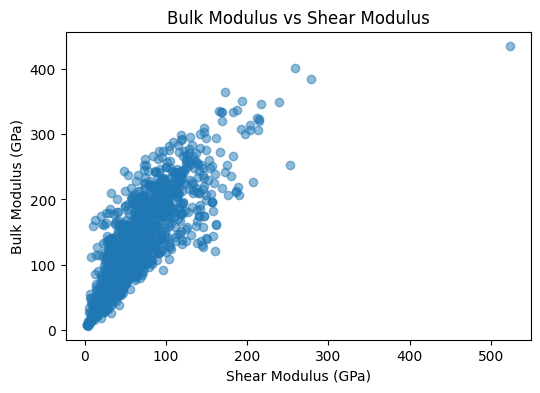

In [24]:
# Let's create a scatter plot of bulk modulus vs shear modulus
plt.figure(figsize=(6, 4))
plt.scatter(df['G_VRH'], df['K_VRH'], alpha=0.5)
plt.xlabel('Shear Modulus (GPa)')
plt.ylabel('Bulk Modulus (GPa)')
plt.title('Bulk Modulus vs Shear Modulus')
plt.show()

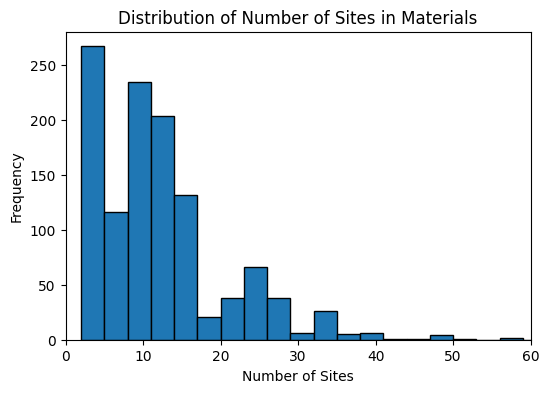


Congratulations! You've just used Matminer to analyze elastic tensor data!


In [36]:
# Let's create a histogram of the number of sites
plt.figure(figsize=(6, 4))
plt.hist(df['nsites'], bins=50, edgecolor='black')
plt.xlim([0, 60]) 
plt.xlabel('Number of Sites')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Sites in Materials')
plt.show()

print("\nCongratulations! You've just used Matminer to analyze elastic tensor data!")